In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

Analyze the protein abundance of PIK3CA with and without mutation

In [4]:
gene = 'PIK3CA'
protList = ['PIK3CA']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for PIK3CA: 
Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

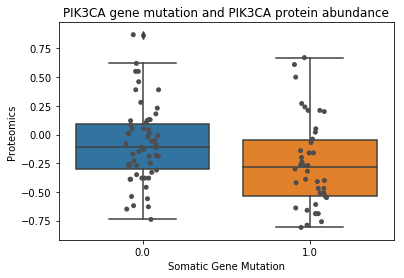

In [5]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Analyze phosphorylation levels 